<a href="https://colab.research.google.com/github/piyushrajtiwari/campusworkshop/blob/master/HAR__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset (HAR from Kaggle)

EDA

Train/test split

Random Forest classifier

Evaluation (accuracy, confusion matrix, classification report)

#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


#**Load dataset**

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

#**EDA**

##**Info of dataset**

In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

print("\nTrain Info:")
print(train.info())


Train data shape: (7352, 563)
Test data shape: (2947, 563)

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


##**Check Missing Values**

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

,0
Activity,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
fBodyBodyGyroJerkMag-sma(),0
fBodyBodyGyroJerkMag-min(),0
fBodyBodyGyroJerkMag-max(),0
fBodyBodyGyroJerkMag-mad(),0
fBodyBodyGyroJerkMag-std(),0
fBodyBodyGyroJerkMag-mean(),0
fBodyBodyGyroMag-kurtosis(),0


In [ ]:
train.isna().sum().sum()

np.int64(0)

<Axes: >

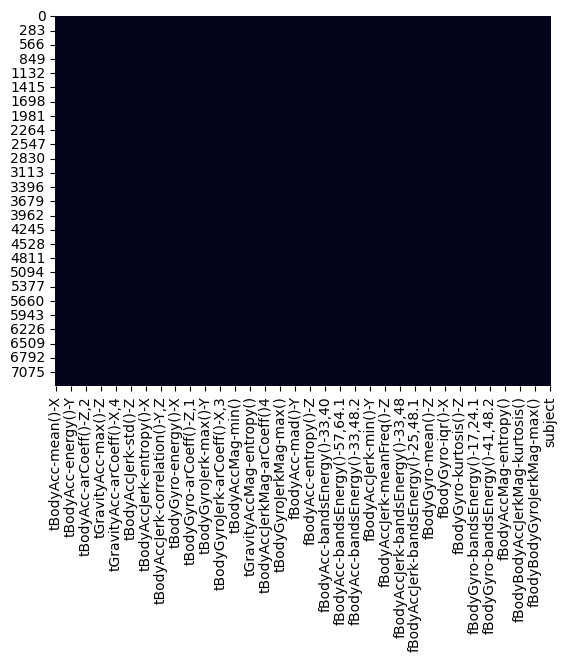

In [ ]:
sns.heatmap(train.isnull(),cbar=False)

##**Summary Statistics**

In [ ]:
train.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
tBodyAcc-std()-Z,7352.0,-0.604754,0.418687,-1.000000,-0.980233,-0.859365,-0.262415,1.000000
tBodyAcc-mad()-X,7352.0,-0.630512,0.424073,-1.000000,-0.993591,-0.950709,-0.292680,1.000000
tBodyAcc-mad()-Y,7352.0,-0.526907,0.485942,-1.000000,-0.978162,-0.857328,-0.066701,0.967664
tBodyAcc-mad()-Z,7352.0,-0.606150,0.414122,-1.000000,-0.980251,-0.857143,-0.265671,1.000000
tBodyAcc-max()-X,7352.0,-0.468604,0.544547,-1.000000,-0.936219,-0.881637,-0.017129,1.000000


##**Target Variable Distribution (Class Balance)**

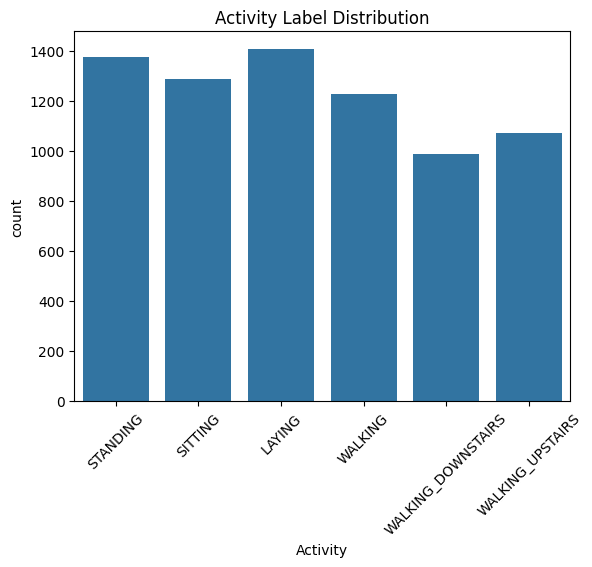

In [ ]:
sns.countplot(x=train["Activity"])
plt.title("Activity Label Distribution")
plt.xticks(rotation=45)
plt.show()


##**Check Correlation (Top 20 numeric features)**

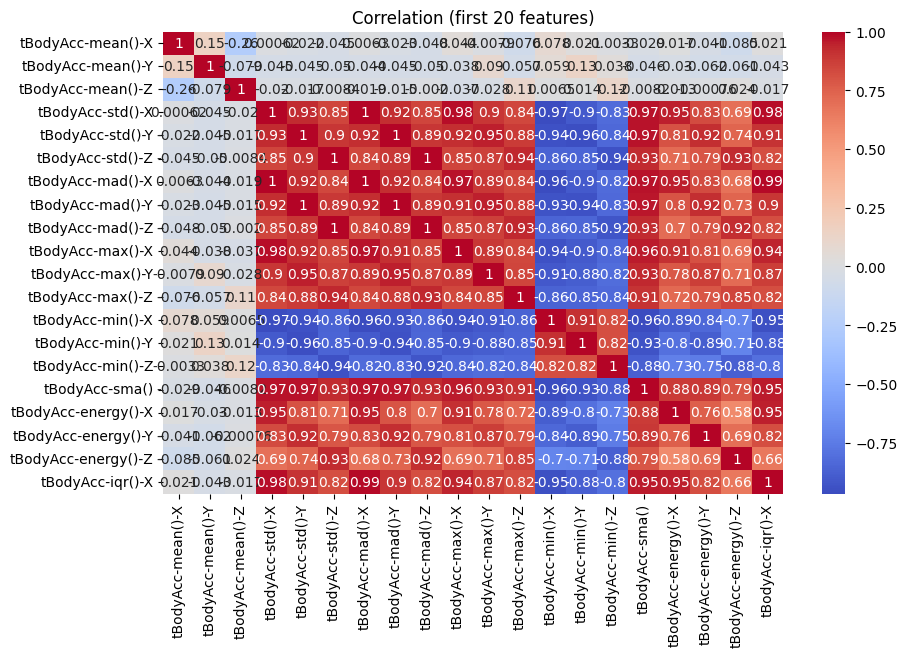

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train.iloc[:, :20].corr(), cmap="coolwarm",annot=True)
plt.title("Correlation (first 20 features)")
plt.show()


##**Boxplot to detect outliers**

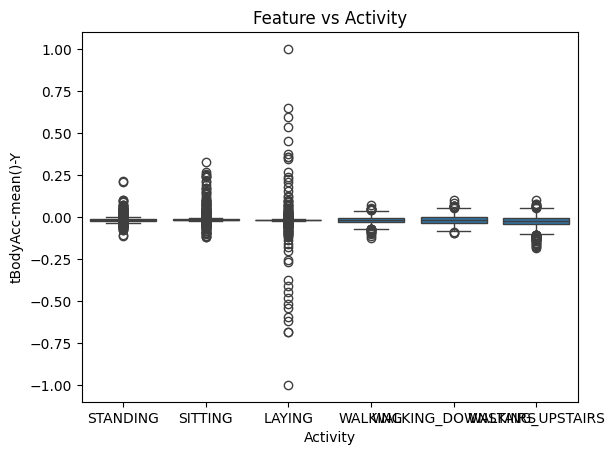

In [ ]:
sns.boxplot(data=train, x="Activity", y=train.columns[1])
plt.title("Feature vs Activity")
plt.show()


##**Feature Distribution (Histogram / KDE plot)**

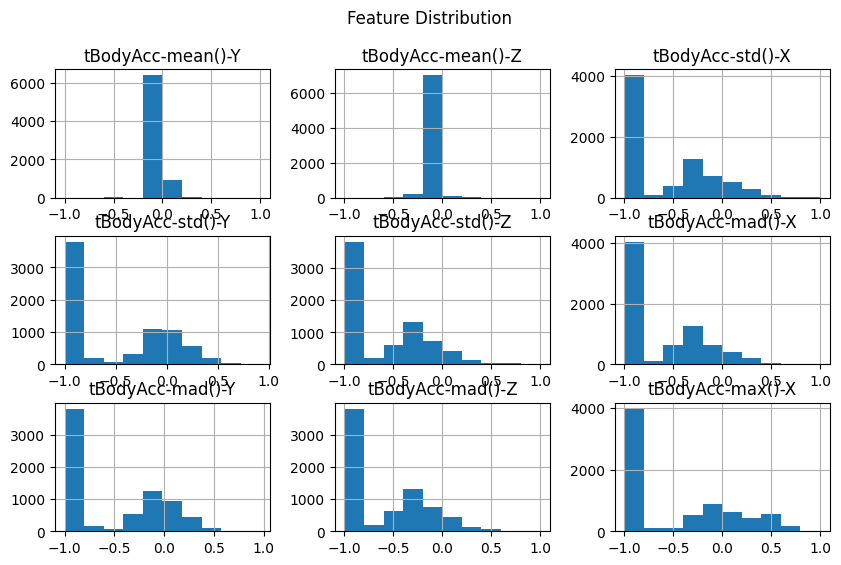

In [ ]:

train.iloc[:, 1:10].hist(figsize=(10,6))
plt.suptitle("Feature Distribution")
plt.show()


##**Summary**

1. There is no missing value
2. Target is balaced
3. many feature have corr
4. many have outlier

##**Basic work**

In [ ]:
TARGET = "Activity"

X = train.drop(columns=[TARGET])
y = train[TARGET]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

##Training random forest

In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)



In [ ]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:


#Time-series cross validation
tscv = TimeSeriesSplit(n_splits=5)

#Model initialization
rf = RandomForestClassifier()

#Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20, None],
}

#GridSearchCV
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

#Fit the model
grid.fit(X_train_scaled, y_train)

#Best model + parameters
print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'max_depth': None, 'n_estimators': 300}


##**Evaluation**

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.95      0.96       262
          STANDING       0.96      0.97      0.96       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      0.98      0.99       206
  WALKING_UPSTAIRS       0.97      0.99      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



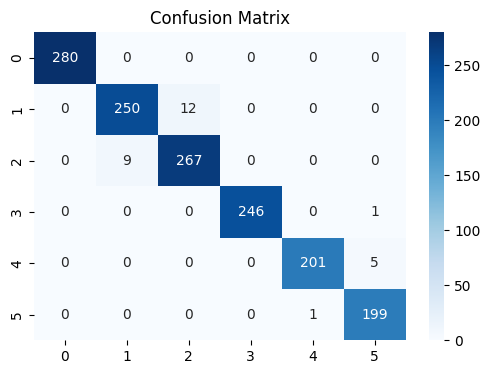

In [ ]:
y_pred = model.predict(X_val_scaled)

print("Classification Report:")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


##**Looking at import feature**

Text(0.5, 1.0, 'Top 30 Important Features')

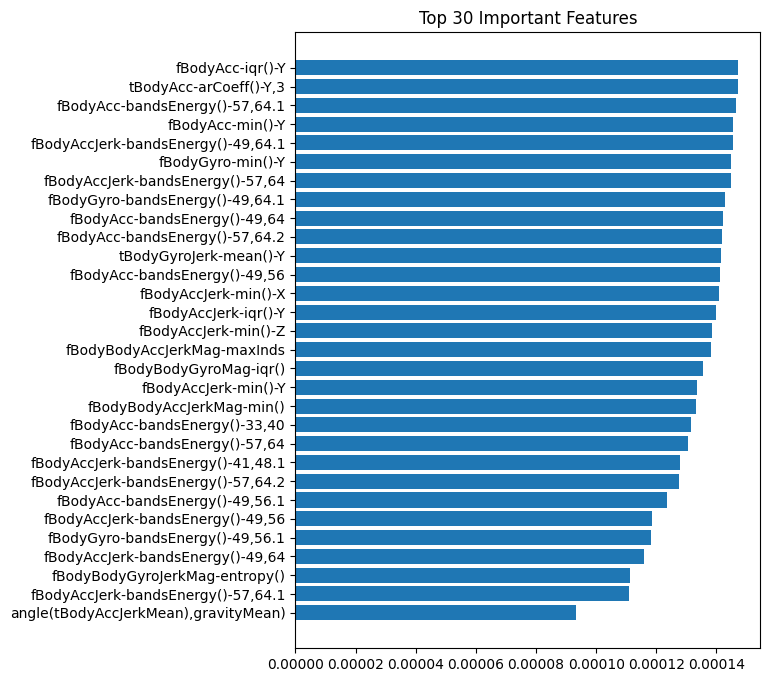

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})

top_features = feature_importance.sort_values(by="Importance", ascending=True).head(30)

plt.figure(figsize=(6,8))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.title("Top 30 Important Features")